In [1]:
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt
from mnist import MNIST
import random

In [2]:
# Sliding window implementation of receptive field
w = np.zeros([5,5])
pot = np.zeros([28,28])
ran = [-2,-1,0,1,2]
ox = 2
oy = 2
w[ox][oy] = 1

for i in range(5):
	for j in range(5):
		d = abs(ox-i) + abs(oy-j)
		w[i][j] = (-0.375)*d + 1

In [34]:
#reading dataset image (16x16)
# img = cv2.imread('1.png', 0)
mndata = MNIST('mnist')

images, labels = mndata.load_training()
index = random.randrange(0, len(images))  # choose an index ;-)
print(mndata.display(images[index]))
imgflat = images[index]
img = np.reshape(imgflat, (28, 28))


............................
............................
............................
............................
............................
............................
...........@@@@@@@..........
.......@@@@@@@@@@@..........
...............@@@..........
...............@@...........
.............@@@@...........
............@@@@@...........
...........@@@@@@@@.........
.........@@@@@...@@@@.......
.........@@.......@@@.......
..................@@@.......
..................@@@.......
..................@@@.......
.................@@@........
................@@@.........
.......@.......@@@..........
.......@......@@@...........
.......@@@.@@@@@............
.......@@@@@@@..............
.........@@.................
............................
............................
............................


In [35]:
#defining time frame of 1s with steps of 5ms
T = 10;
dt = 0.005
time  = np.arange(0, T+dt, dt)

#initializing spike train
train = []

In [36]:
total_spikes = round(T / dt)
for i in range(784):
    temp = np.zeros(total_spikes)
    normalized_px = ( imgflat[i] / 256 )
    if normalized_px > 0:
        num_spikes = round(total_spikes * normalized_px)
        f_spike = round(T / normalized_px)
        for j in range(num_spikes):
            if j*f_spike < total_spikes:
                temp[j*f_spike] = 1
    train.append(temp)

254


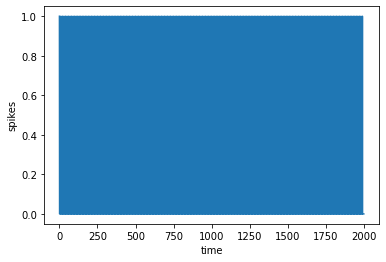

In [39]:
# show the spike train output
# and plot it in a graph
ind = 629
print(imgflat[ind])
plt.plot(train[ind])
plt.ylabel("spikes")
plt.xlabel("time")
plt.show()

In [37]:
for i in range(len(train)):
    if max(train[i]) > 0:
        print(i, imgflat[i])

150 2
151 7
152 7
153 128
154 194
155 158
156 131
157 25
174 1
175 87
176 137
177 137
178 157
179 254
180 254
181 254
182 254
183 254
184 254
185 214
186 20
202 19
203 254
204 254
205 254
206 254
207 251
208 236
209 236
210 236
211 250
212 254
213 254
214 37
230 8
231 105
232 105
233 105
234 105
235 85
238 41
239 232
240 254
241 254
242 37
265 54
266 182
267 254
268 254
269 186
270 15
292 116
293 230
294 254
295 254
296 203
297 16
318 8
319 129
320 230
321 254
322 254
323 254
324 227
325 126
326 44
327 6
344 7
345 129
346 188
347 254
348 254
349 254
350 254
351 254
352 254
353 254
354 254
355 135
356 30
372 32
373 254
374 254
375 254
376 254
377 241
378 198
379 198
380 198
381 218
382 254
383 254
384 224
385 13
400 24
401 232
402 244
403 192
404 104
405 51
409 24
410 228
411 254
412 254
413 18
429 40
430 51
438 218
439 254
440 254
441 18
466 218
467 254
468 254
469 18
493 111
494 248
495 254
496 221
497 12
520 68
521 247
522 254
523 254
524 106
538 53
539 85
547 28
548 206
549 254
550 